In [13]:

import numpy as np
import imutils
import cv2

import matplotlib.pyplot as plt


path = "../data/ellipse_detection/"


In [38]:

def find_ellipses(image):
    threshold = 100
    canny_output = cv2.Canny(image, threshold, threshold * 2)
 
    contours, _ = cv2.findContours(canny_output, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE) #cv2.RETR_TREE
    ellipses = []
    for i, c in enumerate(contours):
        if c.shape[0] > 5:
            ellipse = cv2.fitEllipse(c)
            ellipses.append(ellipse)
            
    return canny_output, ellipses , contours

def handle_image(filename):
    print(filename)
    org = cv2.imread(path + filename) #BGR
    resized = imutils.resize(org, width=100)
    
    resizedrgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
    
    
    images = [resizedrgb]
    
    
    canny, ellipses , contours = find_ellipses(resizedrgb)
    images.append(canny)
    
    rows , cols = resized.shape[0] , resized.shape[1]
    eimg = np.zeros([rows , cols,3],dtype=np.uint8)
    eimg.fill(200) 
  
    for ellipse in ellipses:
        cv2.ellipse(eimg, ellipse, (0,0,0) , 1)
        
    cimg = np.zeros([rows , cols,3],dtype=np.uint8)
    cimg.fill(200) 
    for contour in contours: 
            peri = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.04 * peri, True)
            #cv2.drawContours(cimg, contour, -1, color=(0, 0, 0), thickness=2 ) #thickness=cv2.FILLED
            cv2.polylines(cimg, [approx], True, (255,255,0), thickness=1) 
    images.append(cimg)
    images.append(eimg)

    #dump
    l = len(images)
    #fig, axs = plt.subplots(nrows=1, ncols=l) 
    for i in range(l):
        #axs[i].imshow(images[i])
        plt.imshow(images[i])
        plt.axis('off')
        plt.show()
   

01_original.png


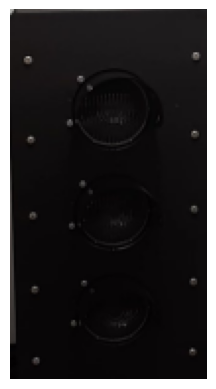

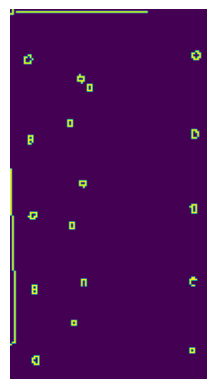

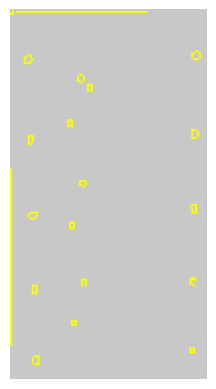

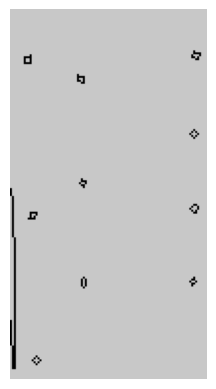

115_original.png


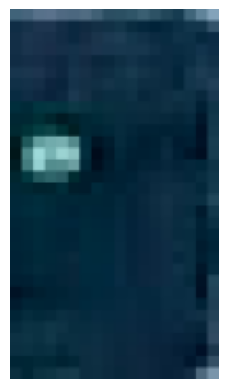

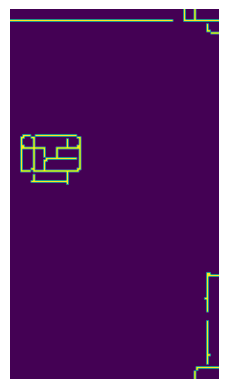

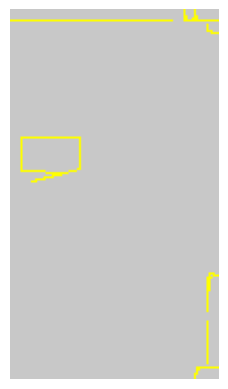

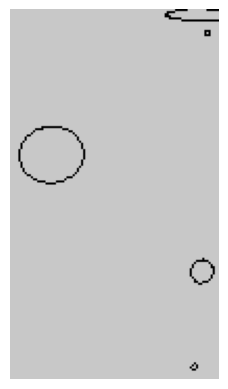

256_original.png


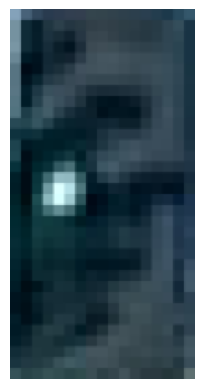

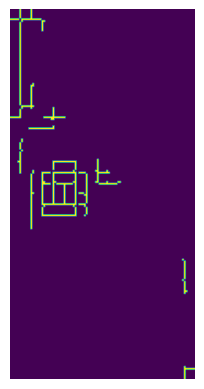

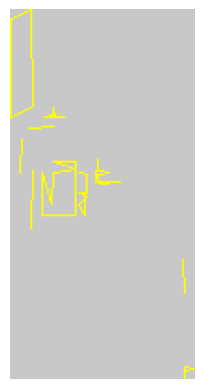

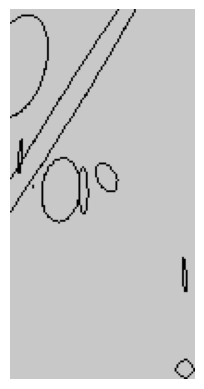

35_original.png


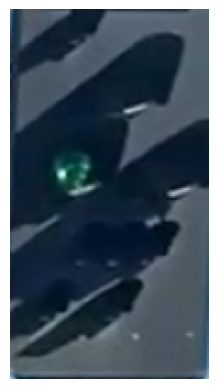

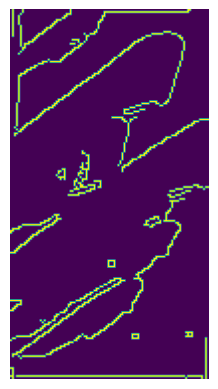

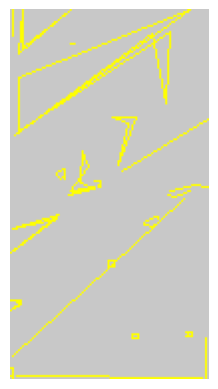

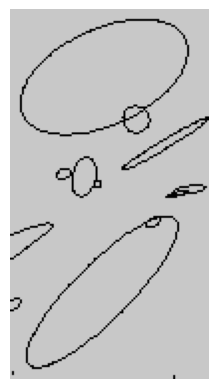

kshauptsignal2_Ks2_vBw.png


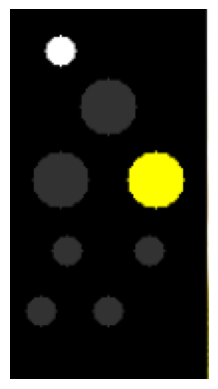

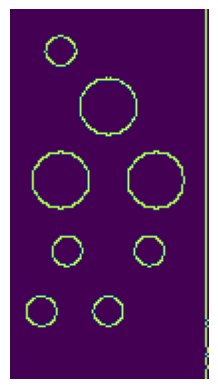

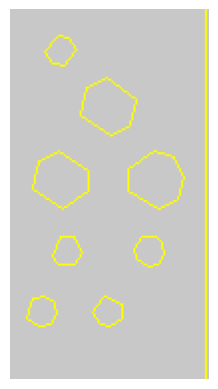

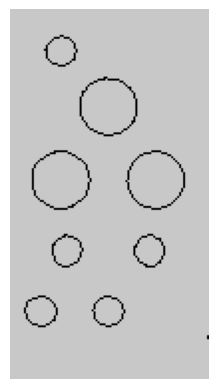

scheibenberg.png


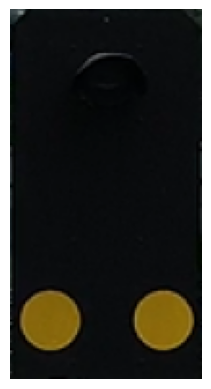

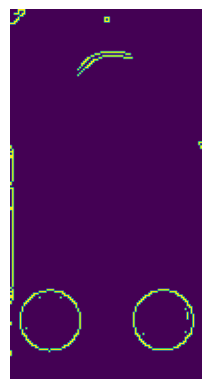

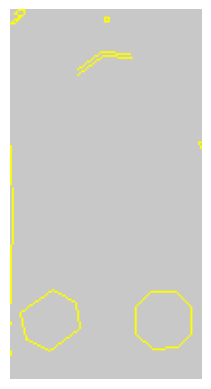

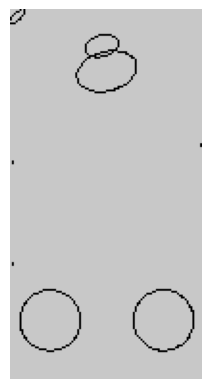

traffic_light0006.png


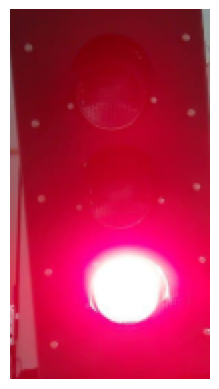

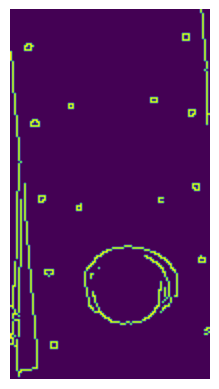

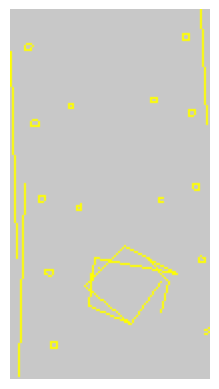

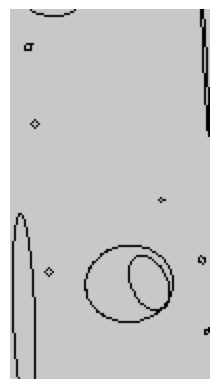

traffic_light0011.png


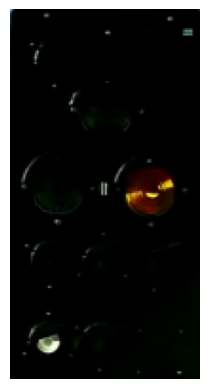

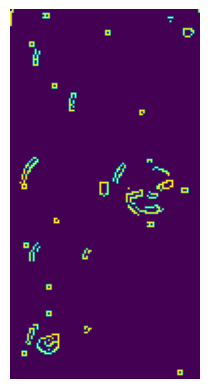

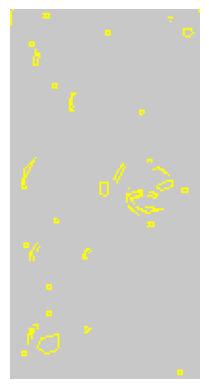

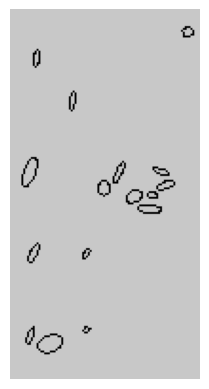

traffic_light0032.png


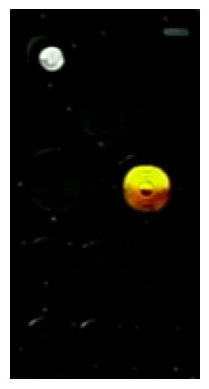

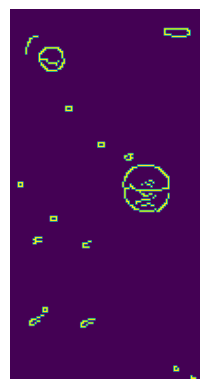

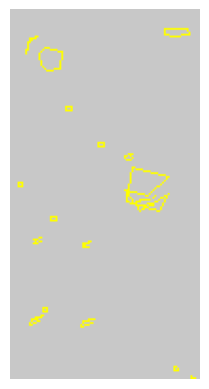

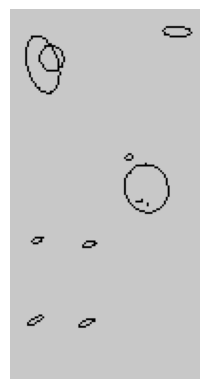

In [39]:
from os import listdir

for filename in listdir(path):
        handle_image(filename)